In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
index = 4
data = np.load('../../Data/sample_NuFit0911.npz')
data_all = np.column_stack([data['ve_dune'][:,:36], data['vu_dune'][:,:36], data['vebar_dune'][:,:36], data['vubar_dune'][:,:36]])
flow = torch.load('./nf/test_{}.pt'.format(index))

In [3]:
n_sample = 1000000
samples = flow.sample(num_samples=n_sample,
            context=torch.tensor(np.array([data_all[0]/1000]), dtype=torch.float32).to(device)).cpu().detach().numpy().reshape(-1, 3)
samples = samples*180/np.pi

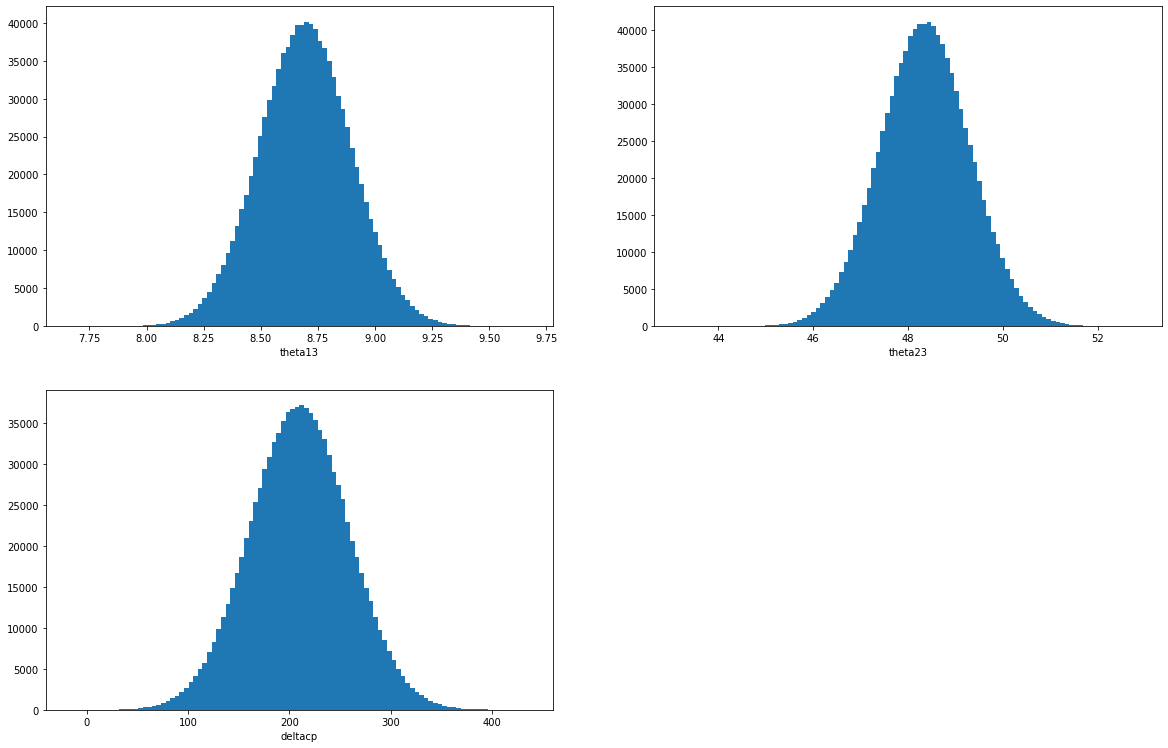

In [4]:
plt.figure(figsize=(20, 20))
labels = ['theta13', 'theta23', 'deltacp']
for i in range(3):
    plt.subplot(3, 2, i+1)
    plt.hist(samples[:, i], bins=100)
    plt.xlabel(labels[i])
plt.show()

In [5]:
N_DUNE, N_T2HK, N_DUT2 = 92, 36, 96
theta23_DUNE, delta_cp_DUNE, chi_DUNE = [], [], []

In [6]:
f_DUNE = open("../../Data/chi_square-4-2_figB_DUNE.txt")
for i in range(N_DUNE):
    s = f_DUNE.readline().split()
    array = []
    for j in range(len(s)) :
        array.append(float(s[j])) 
    theta23_DUNE.append(array[0])
    delta_cp_DUNE.append(array[1]) 
    chi_DUNE.append(array[2])
f_DUNE.close()

In [7]:
theta23_DUNE = np.array(theta23_DUNE)
delta_cp_DUNE = np.array(delta_cp_DUNE)
chi_DUNE = np.array(chi_DUNE)

In [8]:
x0 = np.linspace(min(theta23_DUNE)-3, max(theta23_DUNE)+3, 68)
y0 = np.linspace(min(delta_cp_DUNE)-6, max(delta_cp_DUNE)+6, 20)
X0, Y0 = np.meshgrid(x0, y0)
Z0 = np.zeros((len(X0),len(X0[0])))

for i in range(len(theta23_DUNE)):
    a = np.where(X0 == theta23_DUNE[i])[1][0]
    b = np.where(Y0 == delta_cp_DUNE[i])[0][0]
    Z0[b][a] = 1

/tmp/ipykernel_1364163/2829452942.py:11: UserWarning: No contour levels were found within the data range.
  DUT2 = plot_axis.contour(X0, Y0, Z0, 0, colors='blue', linestyles="-", linewidths=1)


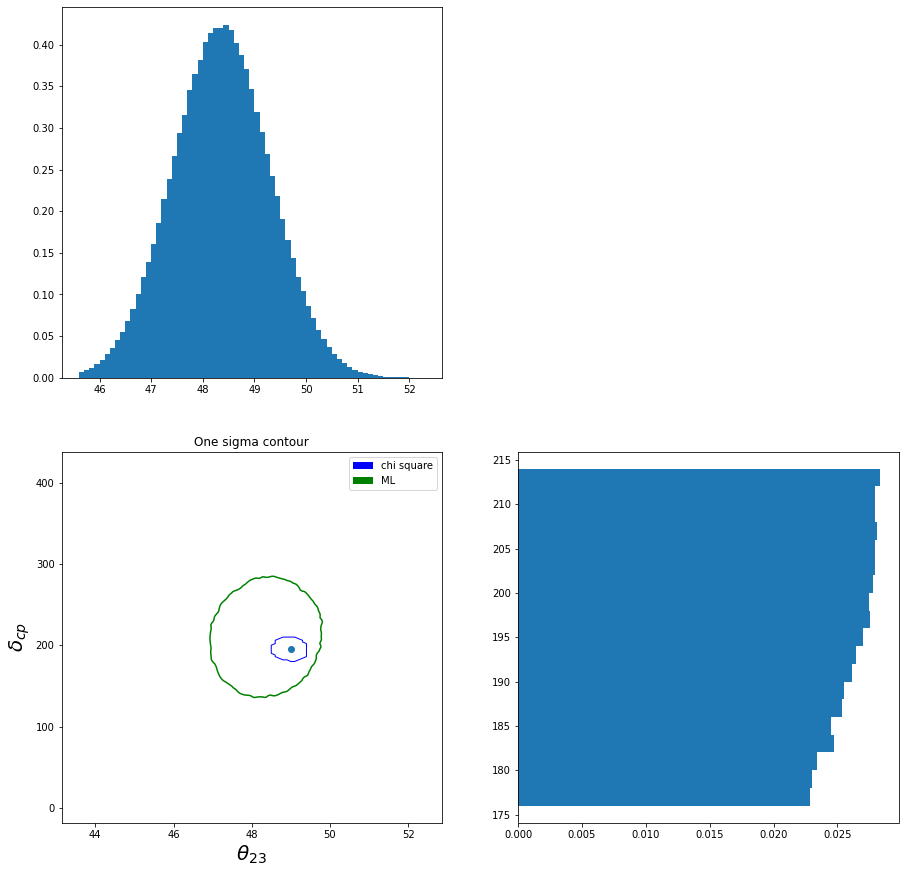

In [9]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
plot_axis = plt.subplot(2,2,1)
plot_axis.hist(samples[:, 1],density=1,bins=x0)

plot_axis = plt.subplot(2,2,4)

plot_axis.hist(samples[:, 2],orientation="horizontal",density=1, bins=y0)

plot_axis = plt.subplot(2,2,3)
plot_axis.set_title('One sigma contour')
DUT2 = plot_axis.contour(X0, Y0, Z0, 0, colors='blue', linestyles="-", linewidths=1)
corner.hist2d(samples[:, 1], samples[:, 2],
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='green',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    # range=[[48,50], [170, 220]],
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )
plt.scatter(data['theta23'][0], data['delta'][0])
plot_axis.set_xlabel(r'$\theta_{23} $', fontsize=20)
plot_axis.set_ylabel(r'$\delta_{cp} $', fontsize=20)
proxy = [plt.Rectangle((2, 2), 0.0, 3, 90, fc=c) for c in ['blue', 'green']]
plt.legend(proxy, ["chi square", "ML"])
plt.show()